# scikit-learn学习笔记

scikit-learn官方网站：
http://scikit-learn.org/stable/index.html

参考书1：Python 机器学习（PYTHON MACHINE LEARNING）作者：Sebastian Raschka
https://github.com/rasbt/python-machine-learning-book

## 模式识别算法

首先导入需要的模块，包括数据模块pandas和numpy，sklearn中的数据集datasets，用于导入鸢尾花（iris）数据。并使用sklearn.model_selection模块中的train_test_split方法，分解训练和测试数据。

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import sklearn as sl
from sklearn import datasets
from sklearn.model_selection import train_test_split
# -*- coding: utf-16 -*-

In [2]:
iris = datasets.load_iris()
help(datasets)

Help on package sklearn.datasets in sklearn:

NAME
    sklearn.datasets

DESCRIPTION
    The :mod:`sklearn.datasets` module includes utilities to load datasets,
    including methods to load and fetch popular reference datasets. It also
    features some artificial data generators.

PACKAGE CONTENTS
    _svmlight_format
    base
    california_housing
    covtype
    kddcup99
    lfw
    mlcomp
    mldata
    olivetti_faces
    rcv1
    samples_generator
    setup
    species_distributions
    svmlight_format
    tests (package)
    twenty_newsgroups

FUNCTIONS
    clear_data_home(data_home=None)
        Delete all the content of the data home cache.
        
        Parameters
        ----------
        data_home : str | None
            The path to scikit-learn data dir.
    
    dump_svmlight_file(X, y, f, zero_based=True, comment=None, query_id=None, multilabel=False)
        Dump the dataset in svmlight / libsvm file format.
        
        This format is a text-based format, wit

In [3]:
X = iris.data[:,[2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
help(train_test_split)
print(X_train.shape)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, None, optional
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, the value is set 

数据标准化过程，从结果上看，其方法是每列数据减均值除以标准差。

In [4]:
from sklearn.preprocessing import StandardScaler
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing.data:

class StandardScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using the
 |  `transform` method.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feature do not more or less look like standard normally
 |  distributed data (e.g. Gaussian with 0 mean and unit variance).
 |  
 |  For instance many elements used in the objective function of
 |  a learning algorithm (such as the RBF kernel of Support Vector
 |  Machines or the L1 and L2 regularizers of linear models) assume that
 |  all features are centered around 0 an

In [5]:
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

StandardScaler(copy=True, with_mean=True, with_std=True)
[ 0.5  0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[ 3.  3.]]


In [6]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions函数是用于显示分类结果的绘图程序，来自参考书1

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

### 感知器 Perceptron

In [8]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

y_pred =ppn.predict(X_test_std)
print('错分样本数： %d' % (y_test!= y_pred).sum())

错分样本数： 4


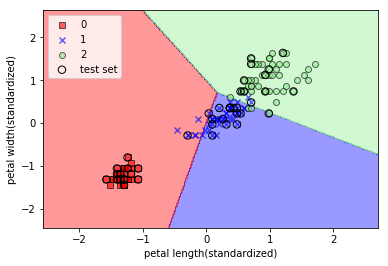

In [9]:
%matplotlib inline

plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel('petal length(standardized)')
plt.ylabel('petal width(standardized)')
plt.legend(loc='upper left')
plt.show()

In [10]:
help(sl.linear_model)

Help on package sklearn.linear_model in sklearn:

NAME
    sklearn.linear_model

DESCRIPTION
    The :mod:`sklearn.linear_model` module implements generalized linear models. It
    includes Ridge regression, Bayesian Regression, Lasso and Elastic Net
    estimators computed with Least Angle Regression and coordinate descent. It also
    implements Stochastic Gradient Descent related algorithms.

PACKAGE CONTENTS
    base
    bayes
    cd_fast
    coordinate_descent
    huber
    least_angle
    logistic
    omp
    passive_aggressive
    perceptron
    randomized_l1
    ransac
    ridge
    sag
    sag_fast
    setup
    sgd_fast
    stochastic_gradient
    tests (package)
    theil_sen

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.linear_model.huber.HuberRegressor(sklearn.linear_model.base.LinearModel, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
        sklearn.linear_model.logistic.LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_m

In [11]:
from sklearn.model_selection import KFold
kf = KFold(5,shuffle=True,random_state=12)
kf_sets = kf.split(X,)

for train, test in kf_sets:
    print(train)
    print(test)
    print("\n")

[  0   2   3   4   5   7   8   9  10  12  13  14  15  17  18  19  20  22
  25  26  27  28  29  30  32  33  34  35  36  37  42  43  44  45  46  47
  48  49  51  52  53  54  55  56  57  58  59  60  62  63  64  65  67  68
  69  70  73  74  75  76  79  80  81  82  83  84  85  86  87  88  89  91
  92  93  94  95  96  97  98 100 101 102 103 104 105 106 107 109 110 111
 112 113 114 115 117 118 119 120 121 122 123 124 127 128 129 130 131 132
 133 134 136 137 138 139 140 141 142 144 147 149]
[  1   6  11  16  21  23  24  31  38  39  40  41  50  61  66  71  72  77
  78  90  99 108 116 125 126 135 143 145 146 148]


[  0   1   2   3   4   5   6  11  13  16  18  20  21  22  23  24  25  27
  28  29  30  31  32  34  35  37  38  39  40  41  42  43  44  45  47  49
  50  51  53  54  55  56  57  58  59  60  61  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  82  83  84  86  87  88  89  90  93  94
  95  96  97  99 100 102 104 105 106 107 108 109 110 112 113 114 115 116
 117 118 119 121 122 1

In [13]:
help(KFold)

Help on class KFold in module sklearn.model_selection._split:

class KFold(_BaseKFold)
 |  K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used once as a validation while the k - 1 remaining
 |  folds form the training set.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle the data before splitting into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState instance, random_state is the random number generator;
 |      If None, the random number generator is the RandomState instance used
 |      by `np.random`. Used when

print(KFold.__doc__)

### Logistic 回归分类

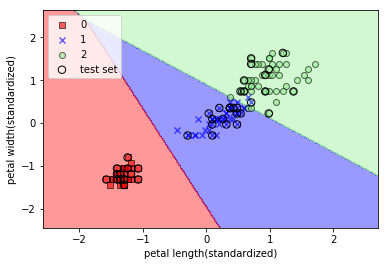

In [15]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length(standardized)')
plt.ylabel('petal width(standardized)')
plt.legend(loc='upper left')
plt.show()

In [17]:
help(sl.svm)

Help on package sklearn.svm in sklearn:

NAME
    sklearn.svm - The :mod:`sklearn.svm` module includes Support Vector Machine algorithms.

PACKAGE CONTENTS
    base
    bounds
    classes
    liblinear
    libsvm
    libsvm_sparse
    setup
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.svm.classes.LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
    sklearn.base.RegressorMixin(builtins.object)
        sklearn.svm.classes.LinearSVR(sklearn.linear_model.base.LinearModel, sklearn.base.RegressorMixin)
        sklearn.svm.classes.NuSVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
        sklearn.svm.classes.SVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
    sklearn.linear_model.base.LinearClassifierMixin(sklearn.base.ClassifierMixin)
        sklearn.svm.classes.LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassif

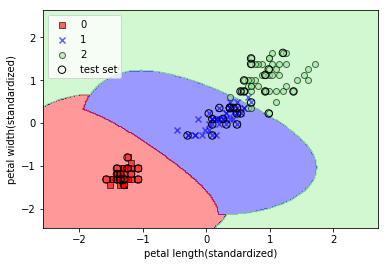

1


In [23]:
svc=sl.svm.SVC()
svc.fit(X_train_std,y_train)
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=svc,
                      test_idx=range(105,150))
plt.xlabel('petal length(standardized)')
plt.ylabel('petal width(standardized)')
plt.legend(loc='upper left')
plt.show()
y_pred=svc.predict(X_test_std)
print((y_pred-y_test!=0).sum())

In [24]:
help(sl.svm.SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

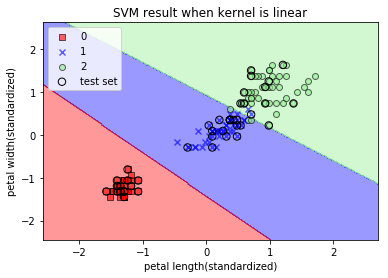

Miss predicted number:  1


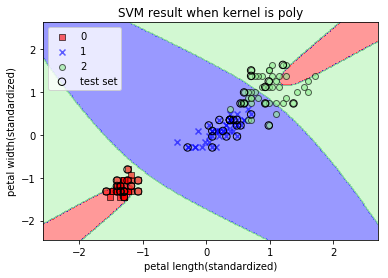

Miss predicted number:  11


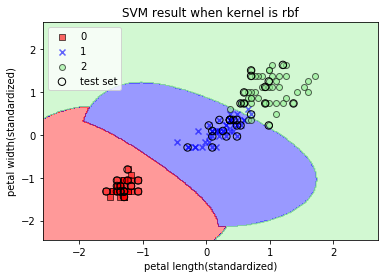

Miss predicted number:  1


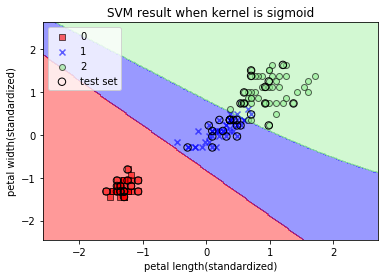

Miss predicted number:  1


In [33]:
kernels=['linear', 'poly', 'rbf', 'sigmoid', ]#'precomputed'
for kn in kernels:
    svc=sl.svm.SVC(kernel=kn,degree=10)
    svc.fit(X_train_std,y_train)
    plot_decision_regions(X=X_combined_std,
                          y=y_combined,
                          classifier=svc,
                          test_idx=range(105,150))
    plt.xlabel('petal length(standardized)')
    plt.ylabel('petal width(standardized)')
    plt.legend(loc='upper left')
    plt.title("SVM result when kernel is %s"%kn)
    plt.show()
    y_pred=svc.predict(X_test_std)
    print("Miss predicted number: ", (y_pred-y_test!=0).sum())

In [31]:
svc.support_ 

array([ 24,  37,  65,  66,  75, 100,   0,   7,  13,  15,  21,  29,  32,
        34,  63,  64,  70,  72,  84,  87,  88,  90,  94,  96,  97,   1,
         3,   4,   9,  10,  11,  12,  17,  25,  31,  53,  74,  92, 101], dtype=int32)